In [2]:
import sys 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from matplotlib import animation


In [3]:
Table.read('./MIST_v1.2_vvcrit0.4_CFHTugriz/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_CFHTugriz.iso.cmd',\
           format = 'ascii', header_start=-1)



EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],CFHT_u,CFHT_g,CFHT_r,CFHT_i_new,CFHT_i_old,CFHT_z,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
14,5.0,0.1,0.09999998746585048,3.4862207608164812,3.1313420078437875,-0.7936671058178539,-0.25,-0.2172,11.639511,10.351183,9.27259,7.421863,7.289774,6.55172,-1.0
15,5.0,0.10264483521052409,0.10264482205216272,3.487361840014425,3.126808017776419,-0.7752541529783836,-0.25,-0.2172,11.579782,10.282725,9.205304,7.367891,7.2362,6.50233,-1.0
16,5.0,0.10703921552827966,0.10703920129064491,3.4892434780670603,3.1193671044823663,-0.7448104503464025,-0.25,-0.2172,11.48149,10.169663,9.094134,7.278721,7.147687,6.420764,-1.0
17,5.0,0.11141918414580901,0.1114191687755168,3.491101990955403,3.1121651055949915,-0.7147489183113934,-0.25,-0.2172,11.385059,10.05807,8.984302,7.190715,7.060339,6.340384,-1.0
18,5.0,0.11578922006201725,0.11578920350356509,3.492937182847681,3.1051434929159094,-0.6849960377509758,-0.25,-0.2172,11.290114,9.947863,8.875689,7.103744,6.974033,6.261096,-1.0
19,5.0,0.12015251878285713,0.12015250097890492,3.494751515584233,3.0983275174580474,-0.6555559583025994,-0.25,-0.2172,11.196487,9.839046,8.768254,7.017825,6.888793,6.182969,-1.0
20,5.0,0.12450712023719923,0.1245071011296722,3.496542324145716,3.0916955500675276,-0.6264246139160312,-0.25,-0.2172,11.103659,9.731731,8.662071,6.933003,6.804669,6.10607,-1.0
21,5.0,0.12885093010385934,0.12885090963400228,3.498308436059524,3.085259204213954,-0.5976256837823304,-0.25,-0.2172,11.012619,9.626034,8.557219,6.849366,6.721753,6.030513,-1.0
22,5.0,0.13318409778677381,0.13318407589474415,3.5000490469843273,3.079000435238438,-0.5691438144320149,-0.25,-0.2172,10.923391,9.521975,8.453688,6.766905,6.64004,5.956308,-1.0


In [4]:
data = Table.read('./MIST_v1.2_vvcrit0.0_UBVRIplus/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_UBVRIplus.iso.cmd',\
          format = 'ascii', header_start=-1)
data 


EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,2MASS_J,2MASS_H,2MASS_Ks,Kepler_Kp,Kepler_D51,Hipparcos_Hp,Tycho_B,Tycho_V,Gaia_G_DR2Rev,Gaia_BP_DR2Rev,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,phase
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
14,5.0,0.1,0.09999998746585048,3.4862207608164812,3.1313420078437875,-0.7936671058178539,-0.25,-0.2172,11.576773,10.914362,9.781591,8.393749,6.590892,4.781341,4.071001,3.86511,8.20989,10.191441,9.569141,11.018705,10.00464,8.105919,10.045743,6.877904,8.11921,10.003132,10.036953,6.852643,6.732532,-1.0
15,5.0,0.10264483521052409,0.10264482205216272,3.487361840014425,3.126808017776419,-0.7752541529783836,-0.25,-0.2172,11.515804,10.847707,9.713316,8.334562,6.538465,4.738173,4.022935,3.819549,8.154368,10.12457,9.506421,10.95333,9.935961,8.052544,9.977938,6.826506,8.06517,9.935299,9.969279,6.801315,6.68257,-1.0
16,5.0,0.10703921552827966,0.10703920129064491,3.4892434780670603,3.1193671044823663,-0.7448104503464025,-0.25,-0.2172,11.415371,10.737701,9.600525,8.236778,6.451846,4.666836,3.943412,3.744168,8.062635,10.014151,9.402812,10.845475,9.82251,7.964358,9.865941,6.741587,7.975888,9.823252,9.857505,6.716511,6.600021,-1.0
17,5.0,0.11141918414580901,0.1114191687755168,3.491101990955403,3.1121651055949915,-0.7147489183113934,-0.25,-0.2172,11.317184,10.629246,9.489135,8.140192,6.366383,4.596467,3.864874,3.669687,7.972054,9.905207,9.300487,10.739223,9.71047,7.877292,9.75535,6.65778,7.887737,9.712612,9.74714,6.632819,6.518562,-1.0
18,5.0,0.11578922006201725,0.11578920350356509,3.492937182847681,3.1051434929159094,-0.6849960377509758,-0.25,-0.2172,11.220631,10.522242,9.379048,8.04464,6.281957,4.526896,3.787182,3.595924,7.882467,9.797653,9.199301,10.634497,9.599745,7.791179,9.64606,6.574937,7.800556,9.603275,9.63808,6.550088,6.438035,-1.0
19,5.0,0.12015251878285713,0.12015250097890492,3.494751515584233,3.0983275174580474,-0.6555559583025994,-0.25,-0.2172,11.125352,10.416698,9.270247,7.950072,6.198602,4.458154,3.7104,3.5229,7.793852,9.691503,9.099213,10.531334,9.490314,7.705999,9.538046,6.493067,7.714329,9.495214,9.5303,6.468329,6.358453,-1.0
20,5.0,0.12450712023719923,0.1245071011296722,3.496542324145716,3.0916955500675276,-0.6264246139160312,-0.25,-0.2172,11.031071,10.31271,9.162827,7.856512,6.116371,4.390234,3.63457,3.450612,7.706231,9.58686,9.000267,10.429846,9.382272,7.621766,9.431395,6.412196,7.629073,9.388519,9.423887,6.387567,6.27983,-1.0
21,5.0,0.12885093010385934,0.12885090963400228,3.498308436059524,3.085259204213954,-0.5976256837823304,-0.25,-0.2172,10.938787,10.210384,9.056885,7.764006,6.035359,4.323205,3.559803,3.379125,7.619663,9.483841,8.902527,10.330158,9.275718,7.538534,9.326197,6.332396,7.544846,9.28328,9.318932,6.307873,6.202239,-1.0
22,5.0,0.13318409778677381,0.13318407589474415,3.5000490469843273,3.079000435238438,-0.5691438144320149,-0.25,-0.2172,10.848602,10.109735,8.952429,7.672518,5.955568,4.257031,3.486104,3.30841,7.534118,9.382465,8.805968,10.2323,9.17066,7.456267,9.222455,6.253647,7.461616,9.1795,9.215434,6.229228,6.125652,-1.0


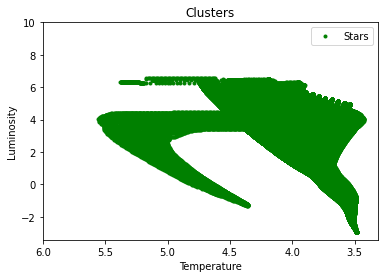

In [5]:
xdata = data['log_Teff']
ydata = data['log_L']
age = data['log10_isochrone_age_yr']

plt.figure()
plt.title('Clusters')
plt.plot(xdata,ydata,'g.', label = 'Stars')
plt.xlim(right=6)
plt.ylim(top=10)
plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [6]:
#isochrone_age = data['log10_isochrone_age_yr']
#if np.where(isochrone_age > '5.0'): 
    
    
    
all_ages = np.array(np.unique(data['log10_isochrone_age_yr']))
print(all_ages)

[ 5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55
  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15
  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75
  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35
  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95
  8.    8.05  8.1   8.15  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55
  8.6   8.65  8.7   8.75  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15
  9.2   9.25  9.3   9.35  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75
  9.8   9.85  9.9   9.95 10.   10.05 10.1  10.15 10.2  10.25 10.3 ]


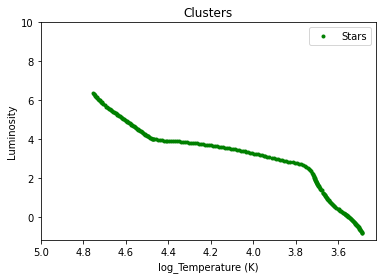

In [7]:
Isochrone_1 = np.where(data['log10_isochrone_age_yr'] == 5.0)[0]
start_index_1 = Isochrone_1[0]
end_index_1 = Isochrone_1[-1]
xdata_1 = data['log_Teff'][start_index_1:end_index_1]
ydata_1 = data['log_L'][start_index_1:end_index_1]

plt.figure()
plt.title('Clusters')
plt.plot(xdata_1,ydata_1,'g.', label = 'Stars')
plt.xlim(right=5)
plt.ylim(top=10)
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Luminosity')
plt.legend()
plt.show()

#age = 5.0 #figure out how to make multiple isochrone HR Diagram plots
#for i in range(10) #replace with a way to go through all types of ages:
    #age = ?
    #Isochrone_i = np.where(data['log10_isochrone_age_yr'] == age)[0]

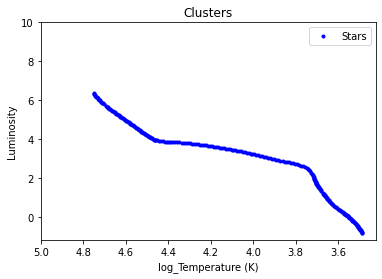

In [8]:
Isochrone_2 = np.where(data['log10_isochrone_age_yr'] == 5.05)[0]
start_index_2 = Isochrone_2[0]
end_index_2 = Isochrone_2[-1]
xdata_2 = data['log_Teff'][start_index_2:end_index_2]
ydata_2 = data['log_L'][start_index_2:end_index_2]

plt.figure()
plt.title('Clusters')
plt.plot(xdata_2,ydata_2,'b.', label = 'Stars')
plt.xlim(right=5)
plt.ylim(top=10)
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Luminosity')
plt.legend()
plt.show()



In [9]:
def isochrone(age_1, age_2):

    values_1_temp = []
    values_1_lum = []

    for i in range(len(data['log10_isochrone_age_yr'])):
        if data['log10_isochrone_age_yr'][i] >= age_1 and data['log10_isochrone_age_yr'][i] < age_2:
            values_1_temp.append(data['log_Teff'][i])
            values_1_lum.append(data['log_L'][i])
    return values_1_temp, values_1_lum

T1, L1 = isochrone(5.0, 6.0)

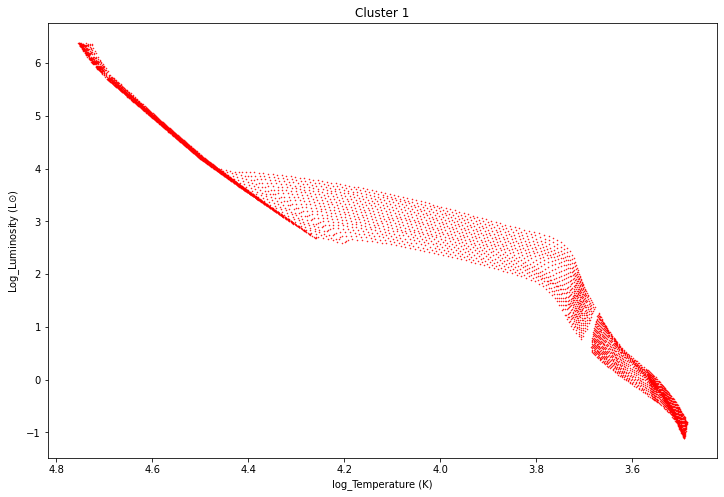

In [10]:

plt.figure(figsize = (12,8))
plt.title('Cluster 1')
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.gca().invert_xaxis()
plt.plot(T1,L1,'r.', markersize = 1)

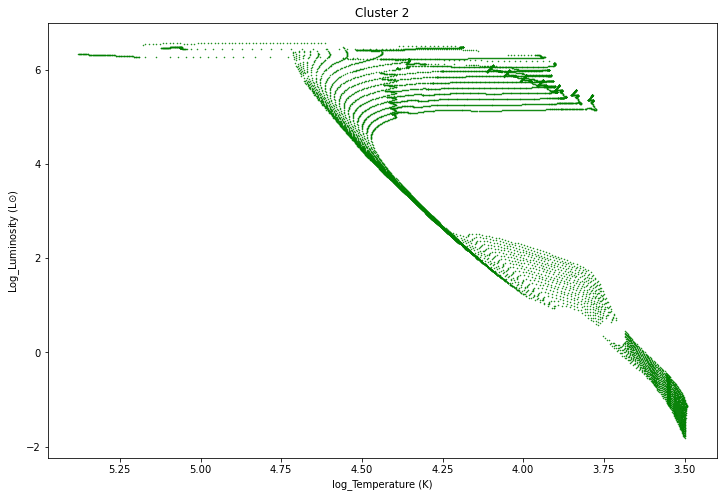

In [11]:
T2, L2 = isochrone(6.05, 7.0)

plt.figure(figsize = (12,8))
plt.plot(T2,L2,'g.', markersize = 1 )
plt.title('Cluster 2')
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.show()

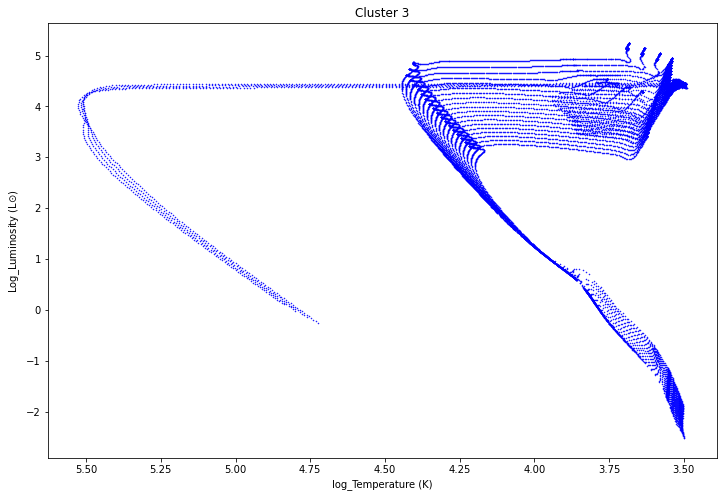

In [12]:
T3, L3 = isochrone(7.05, 8.0)

plt.figure(figsize = (12,8))
plt.title('Cluster 3')
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.plot(T3, L3, 'b.', markersize = 1)
plt.show()

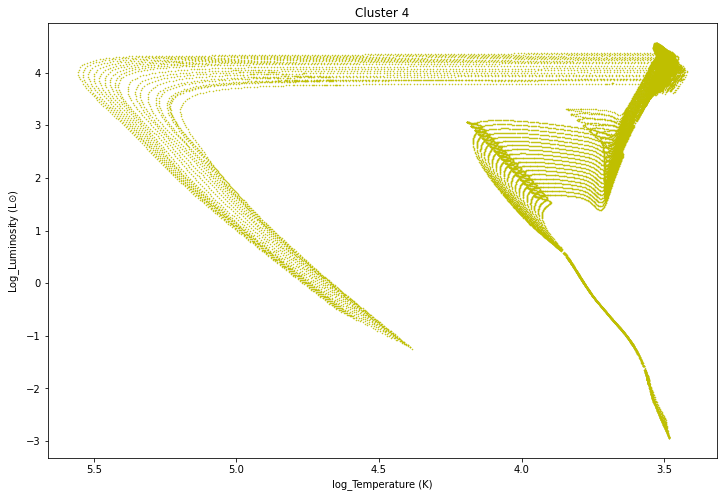

In [13]:
T4, L4 = isochrone(8.05, 9.0)

plt.figure(figsize = (12,8))
plt.title('Cluster 4')
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.plot(T4, L4, 'y.', markersize = 1)
plt.show()

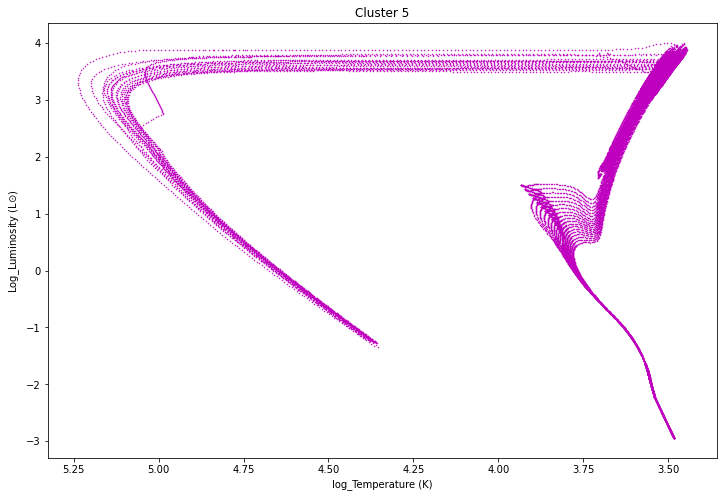

In [14]:
T5, L5 = isochrone(9.05, 10.0)

plt.figure(figsize = (12,8))
plt.title('Cluster 5')
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.plot(T5, L5, 'm.', markersize = 1)
plt.show()

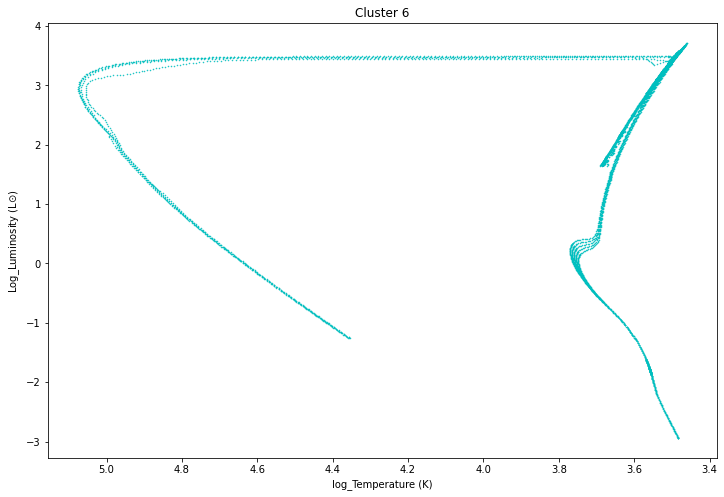

In [15]:
T6, L6 = isochrone(10.05, 10.3)

plt.figure(figsize = (12,8))
plt.title('Cluster 6')
plt.gca().invert_xaxis()
plt.xlabel('log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.plot(T6, L6, 'c.', markersize = 1)
plt.show()

'hold off'

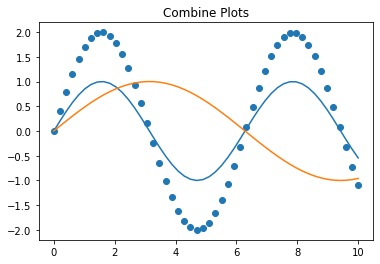

In [16]:
x = np.linspace(0,10,50);
y1 = np.sin(x);
plt.plot(x,y1)
plt.title('Combine Plots')

'hold on'

y2 = np.sin(x/2);
plt.plot(x,y2)

y3 = 2*np.sin(x);
plt.scatter(x,y3) 

'hold off'

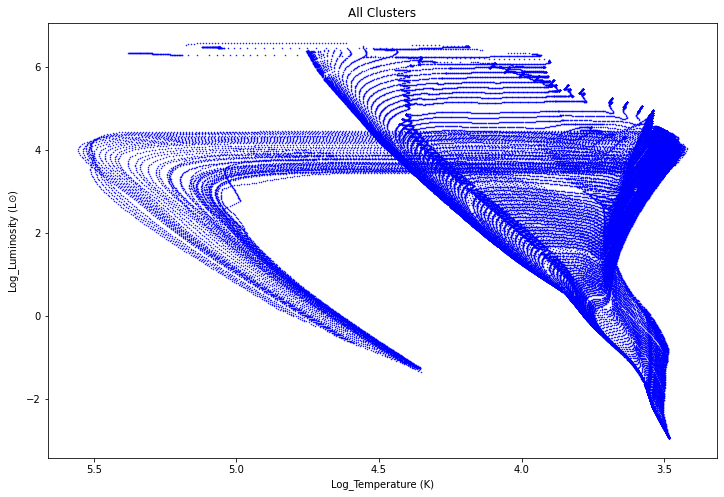

'hold off'

In [17]:

plt.figure(figsize = (12,8))
plt.plot(T1,L1,'b.', markersize = 1)
plt.gca().invert_xaxis()

'hold on'

plt.plot(T2,L2,'b.', markersize = 1 )
plt.plot(T3, L3, 'b.', markersize = 1)
plt.plot(T4, L4, 'b.', markersize = 1)
plt.plot(T5, L5, 'b.', markersize = 1) 
plt.plot(T6, L6, 'b.', markersize = 1)
plt.title('All Clusters')
plt.xlabel('Log_Temperature (K)')
plt.ylabel('Log_Luminosity (L${\odot}$)')
plt.show()

'hold off'

<class 'matplotlib.animation.FuncAnimation'>


RuntimeError: Requested MovieWriter (ffmpeg) not available

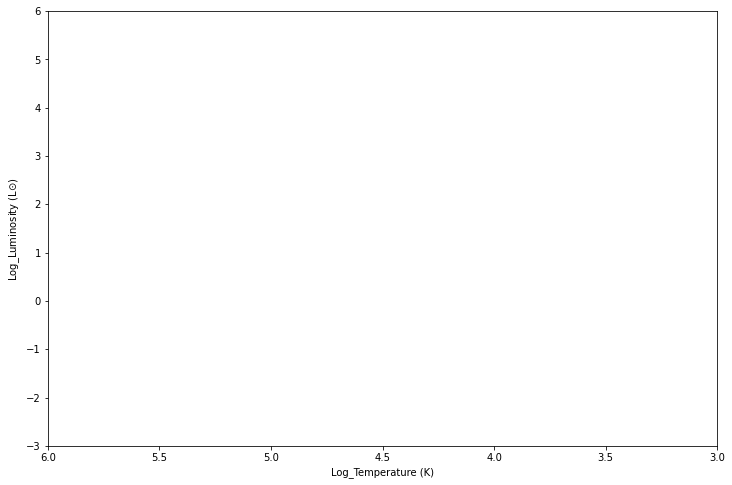

In [18]:
fig = plt.figure(figsize = (12,8))
ax = plt.axes(xlim=(3.0, 6.0), ylim=(-3, 6))
ax.set_xlabel('Log_Temperature (K)')
ax.set_ylabel('Log_Luminosity (L${\odot}$)')
plt.gca().invert_xaxis()
line, = ax.plot([], [],'m.', markersize=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    age = 5+.05*i

    index = np.where(np.round(data['log10_isochrone_age_yr'], decimals = 2) == np.round(age, decimals=2))
    
    x = data['log_Teff'][index]
    y = data['log_L'][index]
    
    line.set_data(x, y)
    ax.set_title('HR Diagram over time (logarithmic)')
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, interval=20, blit=True)
print(type(anim))
#anim.save('basic_animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
Writer = animation.writers['ffmpeg']
writer= Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save('basic_animation.mp4', writer=writer)
plt.show()


In [ ]:
# The code above did not run on my computer since I didn't have the proper software